## Praca domowa 4

#### Autor: Jędrzej Sokołowski nr. albumu 313507

### Zadanie 1 (1.5 pkt)

Używając funkcji z pakietu `numpy` oraz `pandas` odpowiedz na poniższe pytania dotyczące zbioru danych o grach.

a) Wybierz gry, które zostały wydane po 2015 roku przez Nintendo oraz ich sprzedaż w Ameryce była niższa niż w Europie.  

b) Jak rodzaj gry zarobił najwięcej w roku 2010?

c) Jakie typy gier sprzedają się średnio lepiej w Japonii niż w Europie? Jakie to typy gier i jaka jest ta wartość średnia. Wynikiem powinna być tabelka posortowana względem średnich. Nazwij kolumny `Typ Gry` i `Średnia sprzedaż w Japonii`.


In [190]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/R-Ladies-Warsaw/PoweR/master/Cz%C4%99%C5%9B%C4%87%202%20-%20Formatowanie%20danych/Python/data/vgsales.csv",
                delimiter = ",").dropna().reset_index(drop = True)

#### a) Wybierz gry, które zostały wydane po 2015 roku przez Nintendo oraz ich sprzedaż w Ameryce była niższa niż w Europie.

In [181]:
placeholder = df.copy()

In [182]:
df = placeholder.copy()

In [183]:
df.loc[df.Year > 2015].loc[df.Publisher == 'Nintendo'].loc[df.NA_Sales < df.EU_Sales]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4199,4263,Mario & Sonic at the Rio 2016 Olympic Games,3DS,2016.0,Action,Nintendo,0.04,0.16,0.24,0.01,0.46
6477,6590,Mario & Sonic at the Rio 2016 Olympic Games,WiiU,2016.0,Action,Nintendo,0.03,0.11,0.10,0.01,0.26
14703,14971,Teddy Together,3DS,2016.0,Simulation,Nintendo,0.00,0.02,0.00,0.00,0.02


#### a) Odp:  
    Mario & Sonic at the Rio 2016 Olympic Games na 3DS  
    Mario & Sonic at the Rio 2016 Olympic Games na WiiU  
    Teddy Together na 3DS

#### b) Jak rodzaj gry zarobił najwięcej w roku 2010?

In [368]:
df = placeholder.copy()

In [369]:
df = df.loc[df.Year == 2010]

# Ręcznie zrobiłem kolomnę All_Sales bo nie zauważyłem że jest Global_Sales

# df['All_Sales'] = df[df.columns[pd.Series(df.columns).str.endswith('Sales')]].sum(axis=1)
# print(df.head())
# df = (df.groupby("Genre").All_Sales.agg("sum")).to_frame()
# print(df.head())
# df = df.rename(columns = {"All_Sales":"Suma"})
# df.loc[df.Suma == max(df.Suma)]

df = (df.groupby("Genre").Global_Sales.agg("sum")).to_frame()
df.loc[df.Global_Sales == max(df.Global_Sales)]


,Global_Sales
Genre,
Action,117.64


#### b) Odp  
    Najwięcej w 2010 roku zarobiły gry akcji

#### c) Jakie typy gier sprzedają się średnio lepiej w Japonii niż w Europie? Jakie to typy gier i jaka jest ta wartość średnia. Wynikiem powinna być tabelka posortowana względem średnich. Nazwij kolumny Typ Gry i Średnia sprzedaż w Japonii.

In [370]:
import numpy as np

In [389]:
df = placeholder.copy()

In [390]:
df['JP_Mean'] = df['JP_Sales'].groupby(df['Genre']).transform('mean')
df['EU_Mean'] = df['EU_Sales'].groupby(df["Genre"]).transform('mean')
df = df.loc[df.JP_Mean > df.EU_Mean]
df = df[["Genre", "JP_Mean"]]
df = df.rename(columns = {"Genre":"Typ Gry", "JP_Mean":"Średnia sprzedaż w Japonii"})
df = df.drop_duplicates()
df.sort_values(by = ['Średnia sprzedaż w Japonii'])

,Typ Gry,Średnia sprzedaż w Japonii
165,Strategy,0.073284
5,Puzzle,0.099439
4,Role-Playing,0.238293


#### c)  Odp
    Wynikowe typy i ich srednie to:  
        Strategy, 0.073284  
        Puzzle, 0.099439,  
        Role-Playing, 0.238293

### Zadanie 2 (3.5 pkt)

Wykorzystując narzędzie do wizualizacji w Pythonie (matplotlib, seaborn) należy poprawić wykres, który był rozwiązaniem pracy domowej 2 (najlepiej poprawić swoją pracę domową, ale można też cudzą).

Rozwiązanie powinno zawierać:

1) oryginalny wykres wraz ze źródłem

2) wykres w ggplot2 wraz z linkiem do pracy domowej w której się on pojawił (kod nie jest potrzebny)

3) poprawiony wykres z punktu 2) w Pythonie

4) uzasadnienie, czemu wykres w Pythonie jest lepszy od dwóch pozostałych.

#### 1) Oryginalny wykres 
Poniższy wykres pochodzi z Wiadomości TVP z dnia 23.10.2021, obrazuje liczbę nowych
zakażeń koronawirusem w Polsce.  
Można go znaleźć w 28 sekundzie nagrania znajdującego
się na następującej stronie:  
https://wiadomosci.tvp.pl/56540366/czwarta-fala-niezaszczepionych  

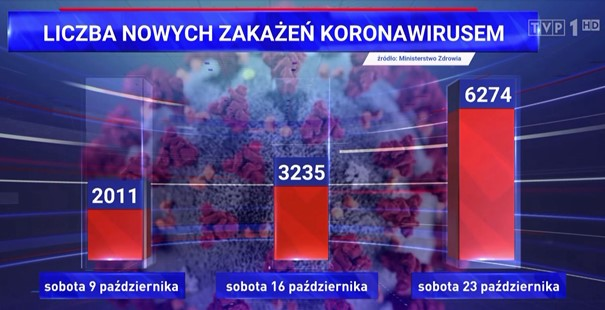
<!-- ![title](./old_plot.jpg) -->

#### 2) Wykres w ggplot2
Następny wykres jest wynikiem poprawy powyższego.  
Jest on jest dostępny w moim rozwiązaniu pracy domowej nr. 2:  
https://github.com/mini-pw/2022Z-DataVisualizationTechniques/blob/main/homeworks/hw2/SokolowskiJedrzej/HW2_raport_Sokolowski.pdf

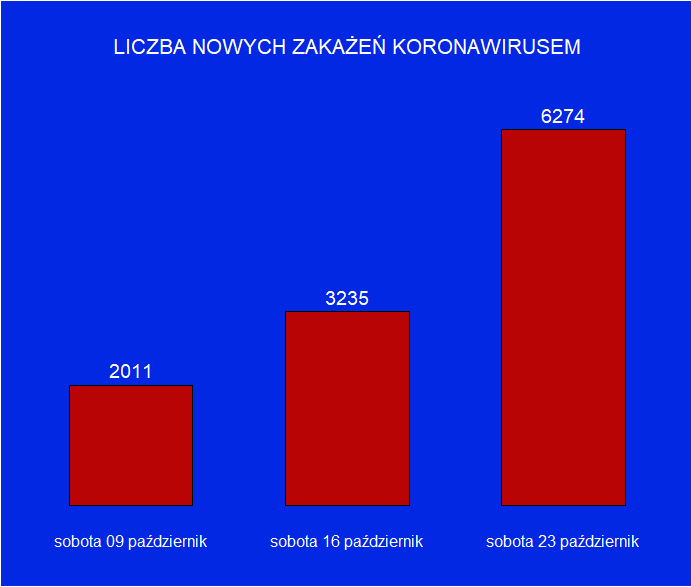

#### 3) Wykres z punktu 2 poprawiony w Pythonie

In [295]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import locale 

In [355]:
# Przygotowanie danych

locale.setlocale(locale.LC_TIME, "pl_PL")
daty = ['2021-10-09','2021-10-16','2021-10-23']
daty = [datetime.strptime(i, "%Y-%m-%d") for i in daty]
daty = [datetime.strftime(i, "%A %d %B") for i in daty]
new_c19_cases = [2011, 3235, 6274]

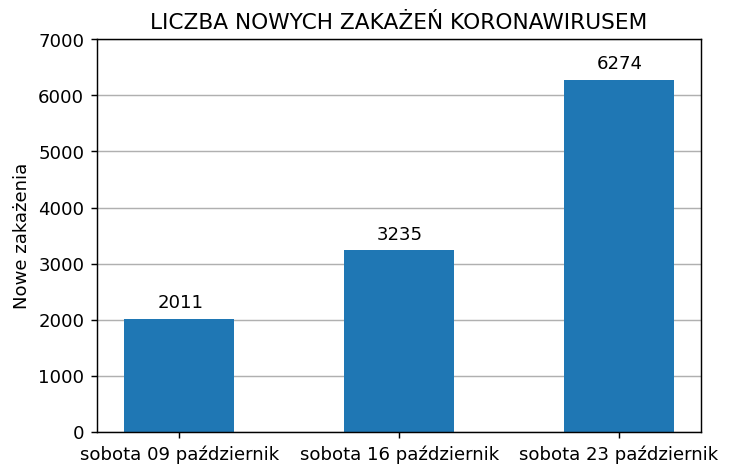

In [366]:
# Wykres

fig, ax = plt.subplots()
ax.grid(zorder=1, axis = 'y')
ax.bar(daty, new_c19_cases, width=0.5, zorder=2)
for i, v in enumerate(new_c19_cases):
    ax.text(i-0.1, v+ 200, str(v), color='black')
ax.set_ylim([0, 7000])
plt.title("LICZBA NOWYCH ZAKAŻEŃ KORONAWIRUSEM")
plt.ylabel("Nowe zakażenia")
ax.set_xticks(daty)
fig.set_dpi(130)

#### 4) Uzasadnienie
Wykres stworzony przy pomocy Pythona jest lepszy od oryginalnego ponieważ nie korzysta ze słupków 3d i dlatego, że słupki są wypełnione jednolitym kolorem.  
Poprawki względem poprawionego wykresu z pracy domowej nr 2, są takie, że kolory nie utrudniają czytania oraz wykres posiada oś y wraz z liniami siatki.